In [1]:
from rockpool.nn.networks import SynNet, WaveSenseNet
from torch.utils.data import Dataset,DataLoader
import pickle
thr = 1.0
thr_out = 2.0
snn = WaveSenseNet(n_channels_in=24, 
                   n_classes=4, 
                   dilations=[2,16,32],
                   threshold=thr, 
                   threshold_out=thr_out)
snn.load('/home/liruixin/workspace/gait_classification/models/model_first_spike.pth')

/home/liruixin/workspace/gait_classification/gait/lib/python3.8/site-packages/rockpool/nn/networks/__init__.py:10: UserWarning: This module needs to be ported to teh v2 API.
  warnings.warn(f"{err}")
/home/liruixin/workspace/gait_classification/gait/lib/python3.8/site-packages/rockpool/nn/networks/__init__.py:15: UserWarning: This module needs to be ported to the v2 API.
  warnings.warn(f"{err}")


In [2]:
with open('/home/liruixin/workspace/gait_classification/data/dataset/train_dataset.pkl', 'rb') as file:
    train_dataset = pickle.load(file)
with open('/home/liruixin/workspace/gait_classification/data/dataset/test_dataset.pkl', 'rb') as file:
    test_dataset = pickle.load(file)

/home/liruixin/workspace/gait_classification/gait/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/tmp/ipykernel_2920767/1483215789.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


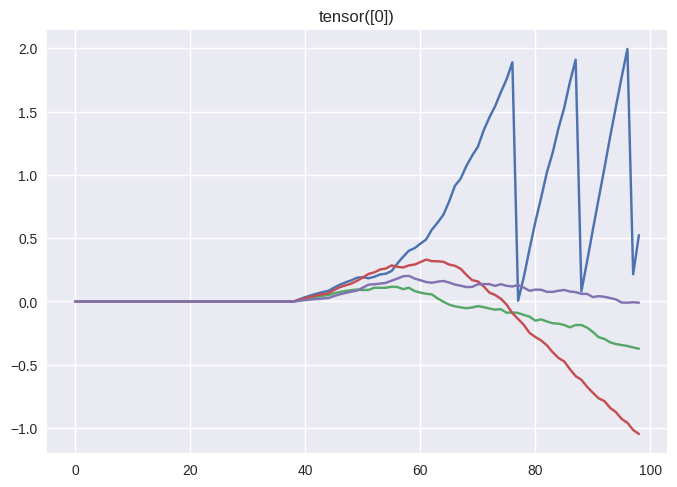

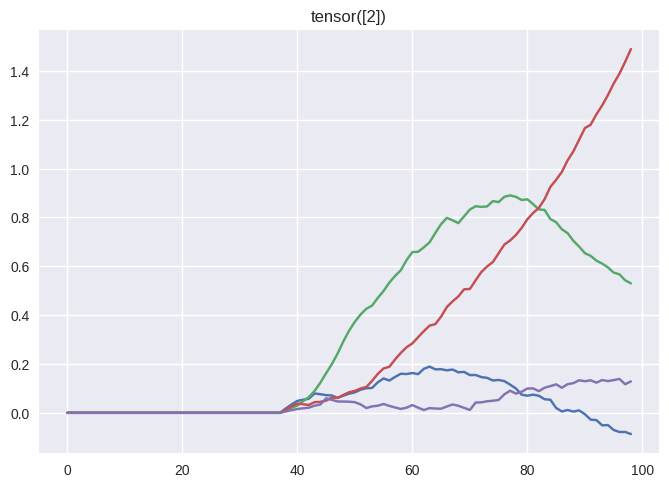

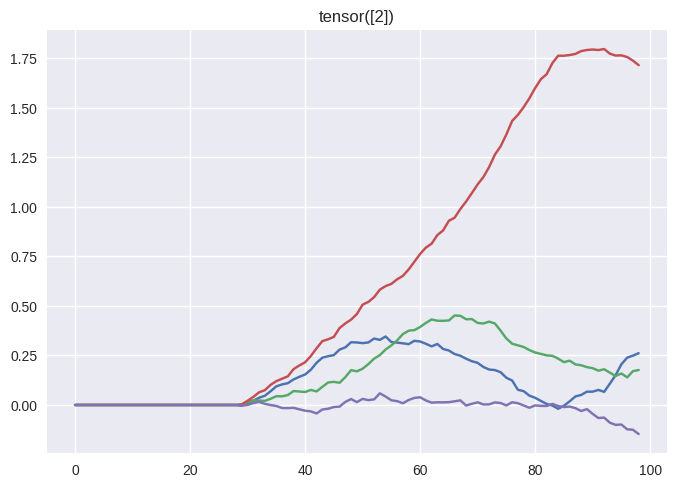

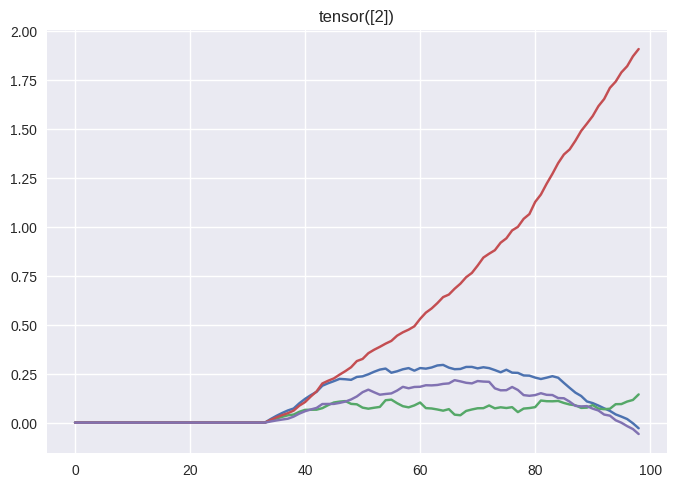

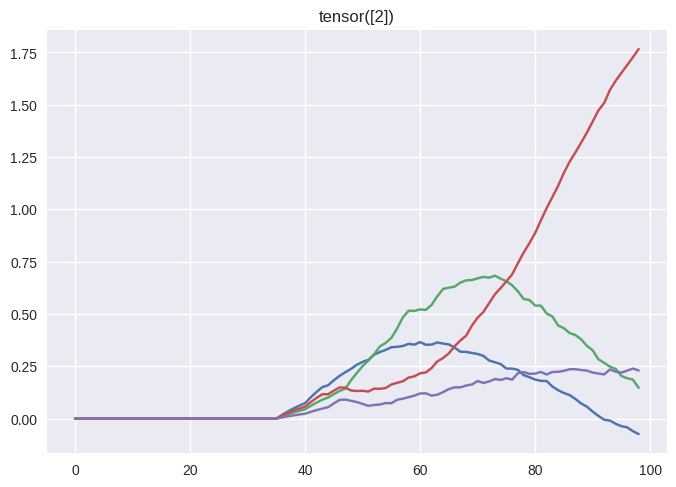

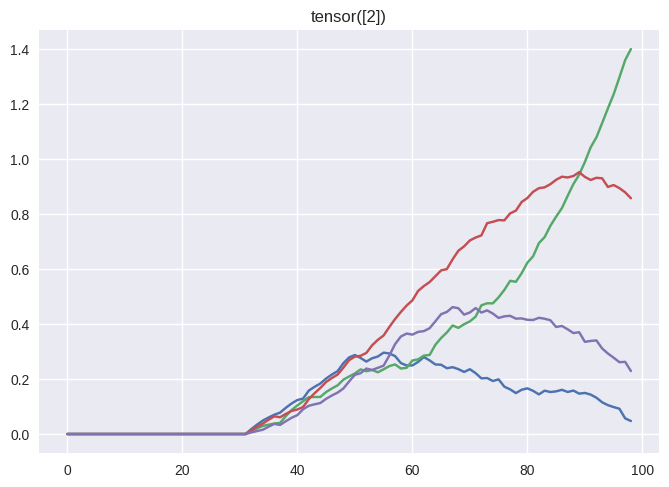

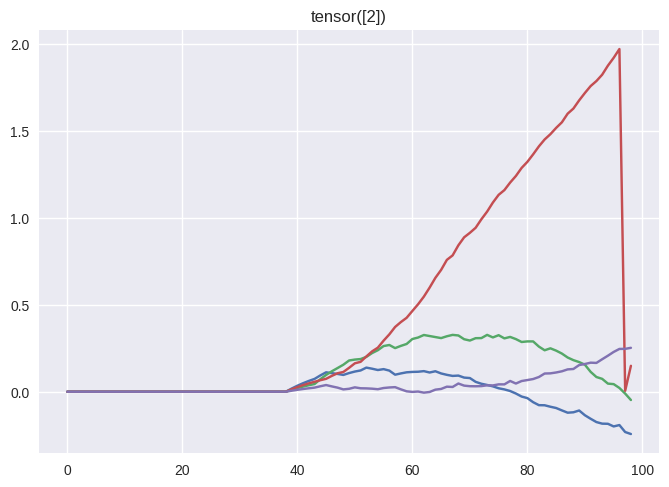

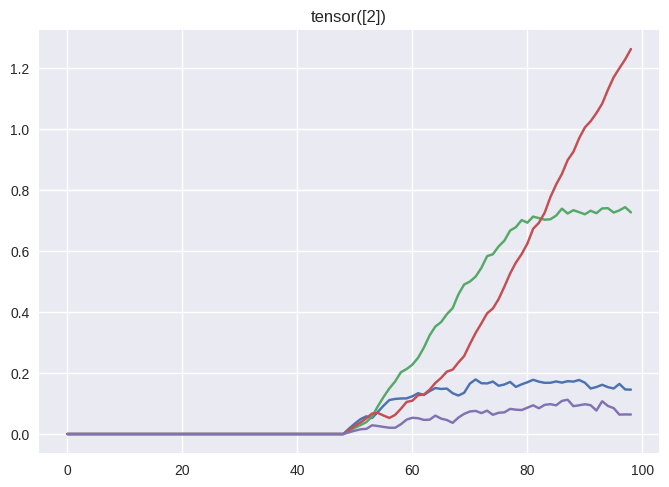

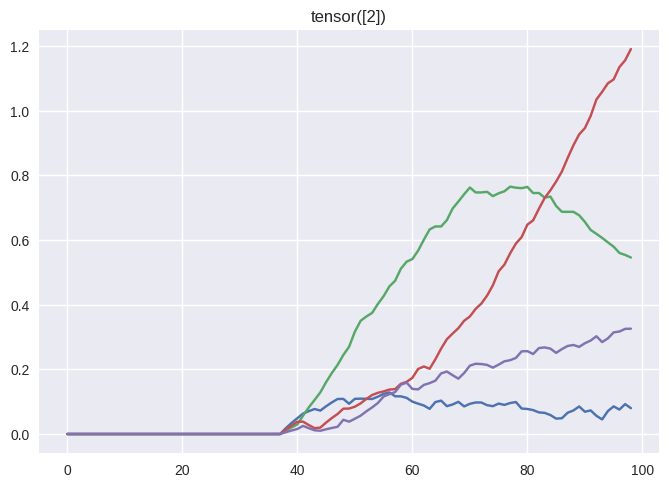

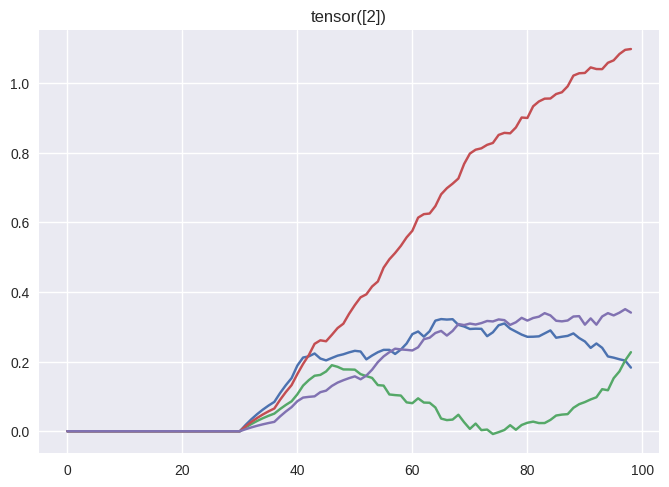

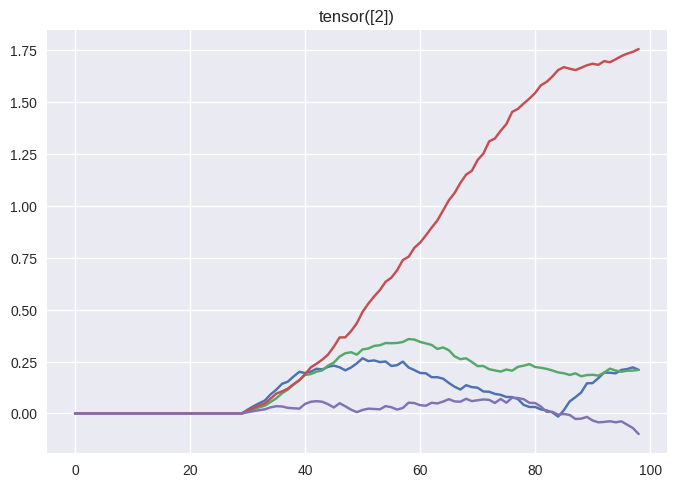

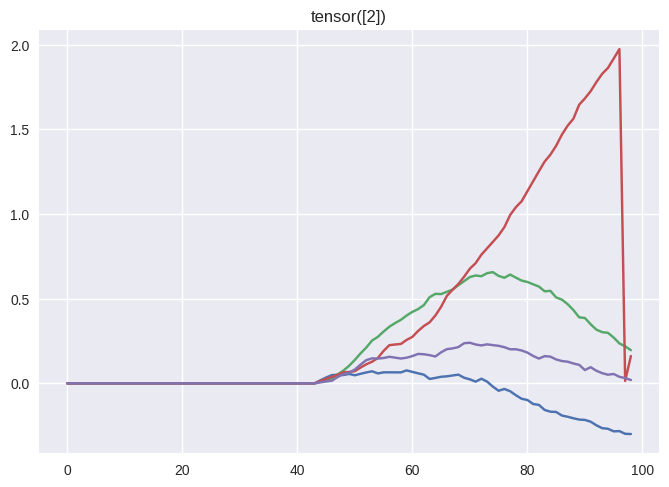

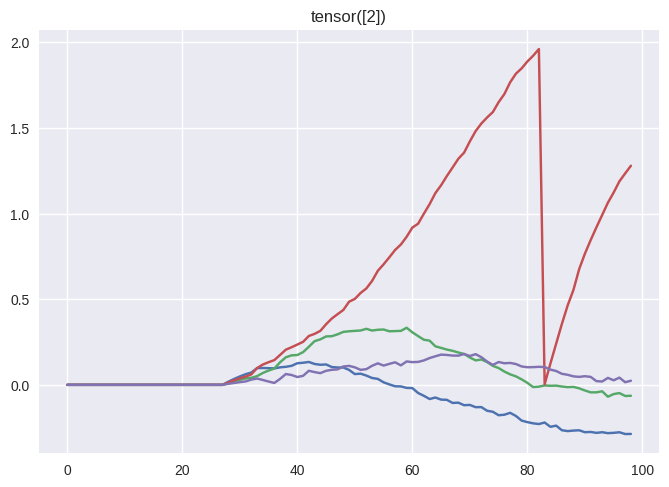

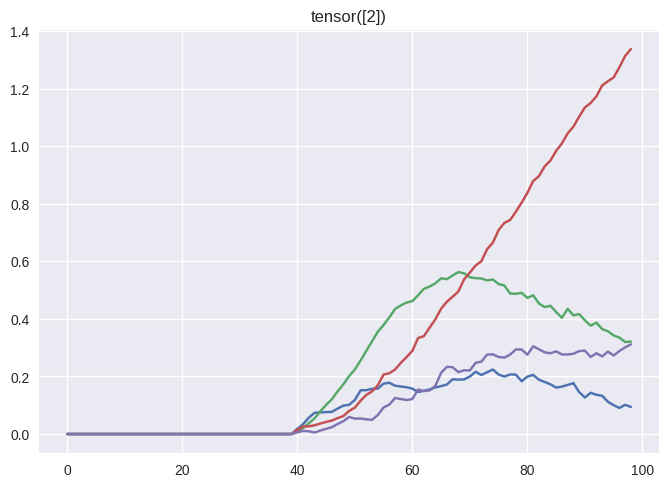

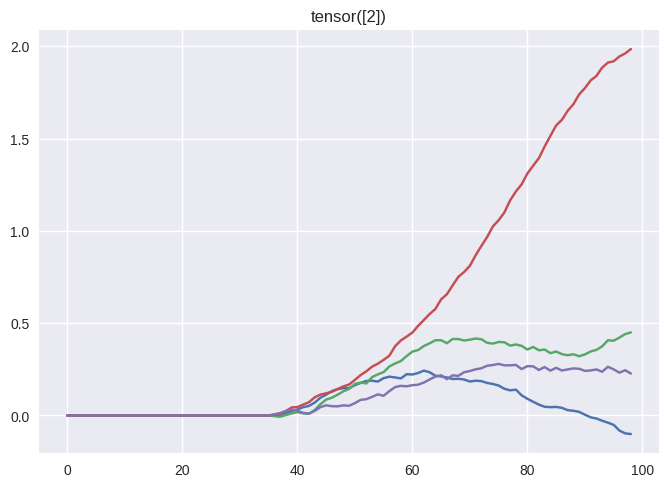

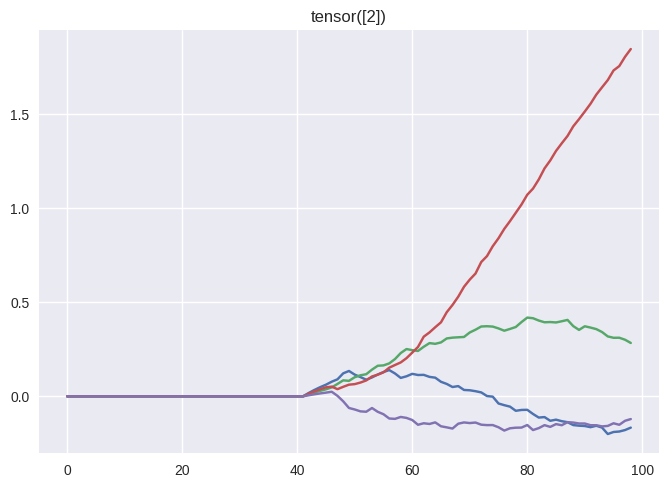

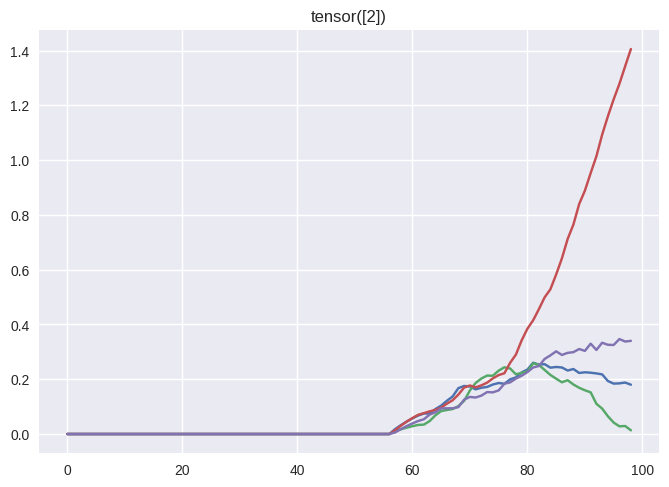

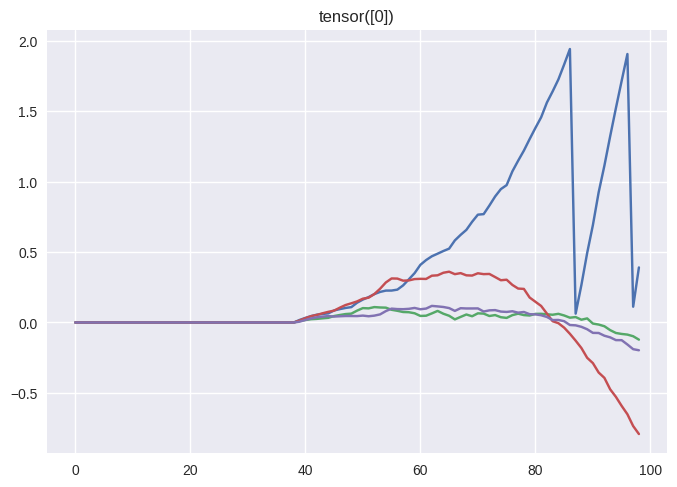

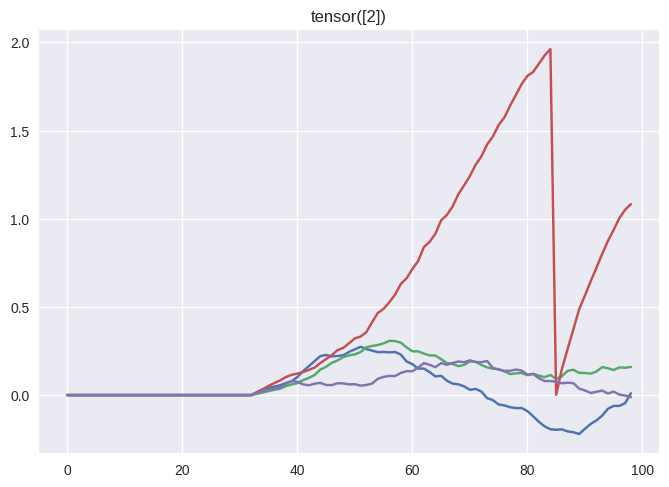

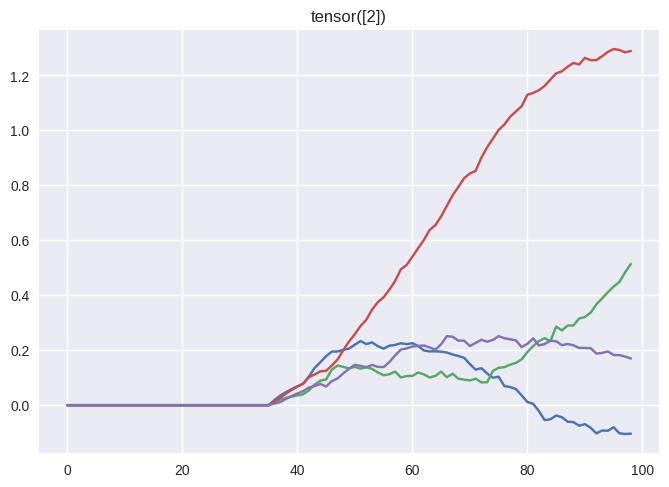

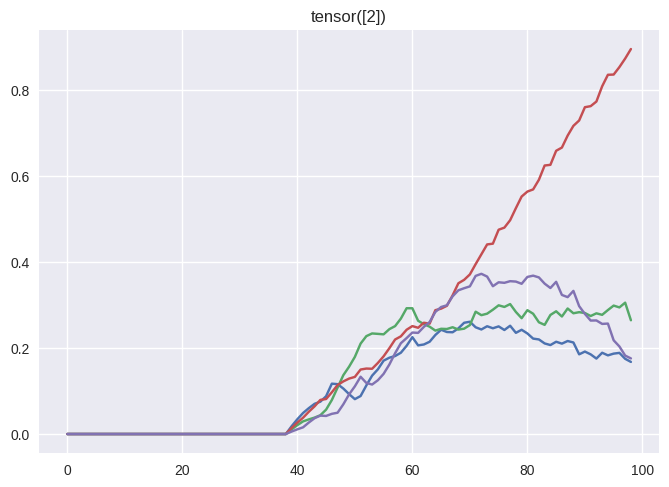

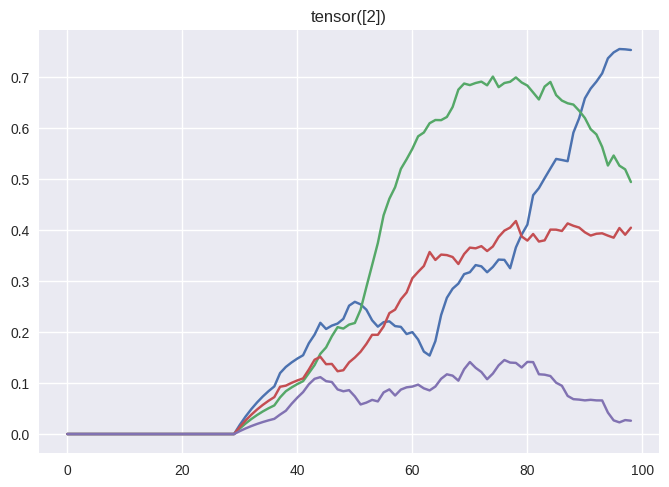

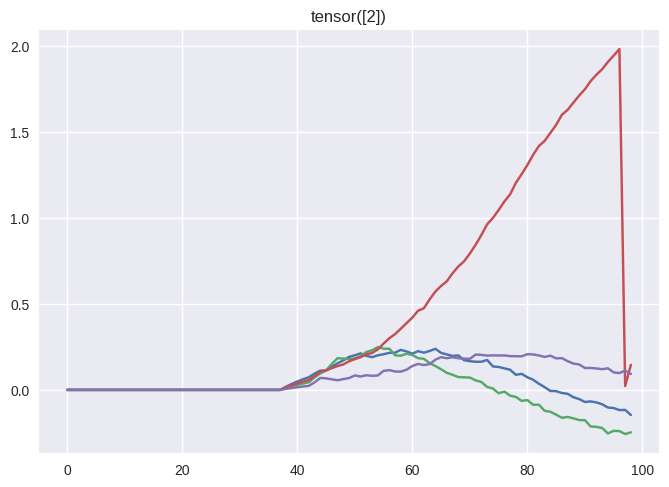

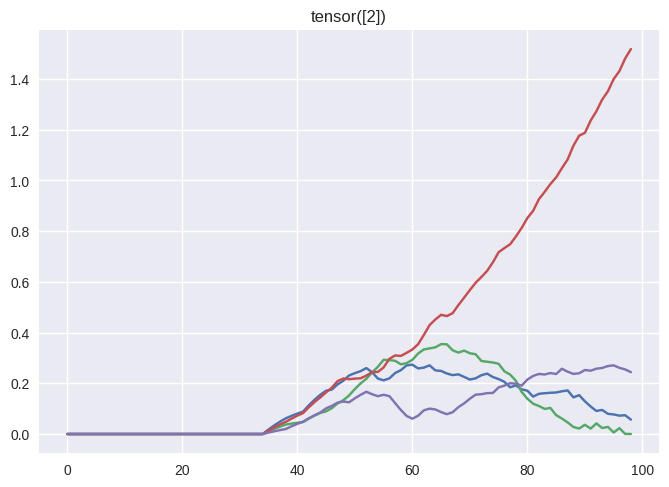

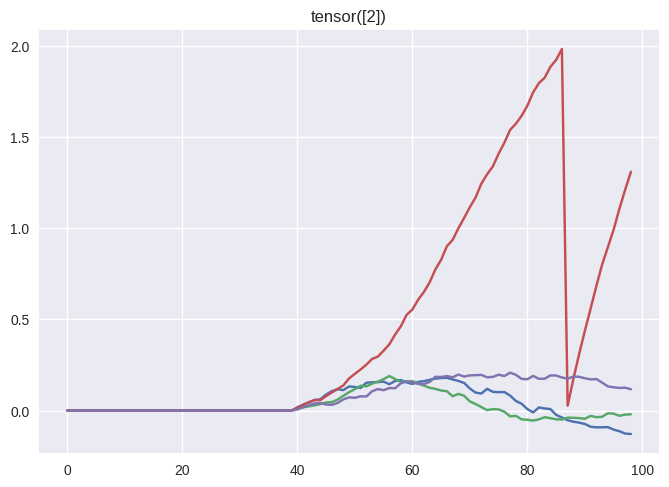

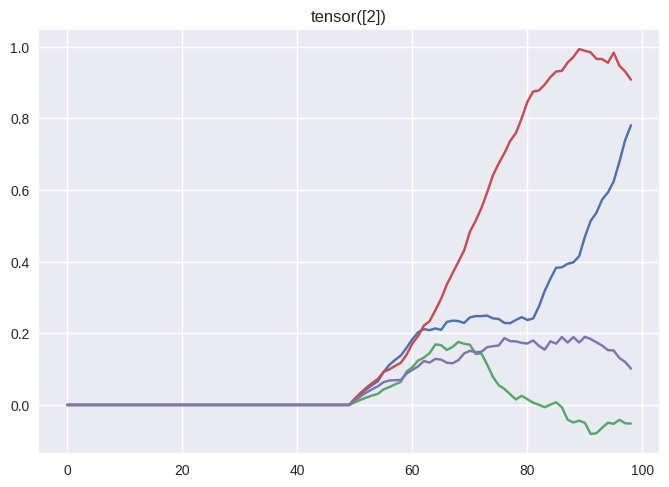

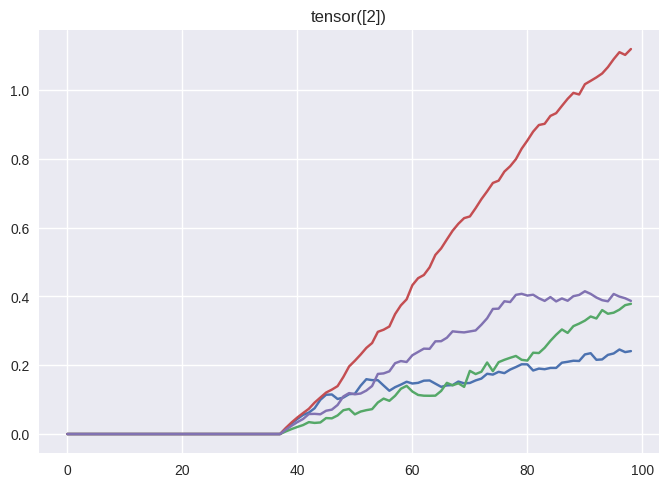

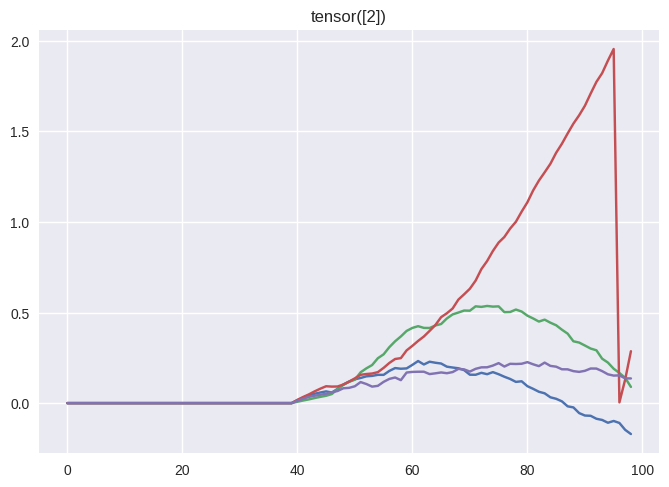

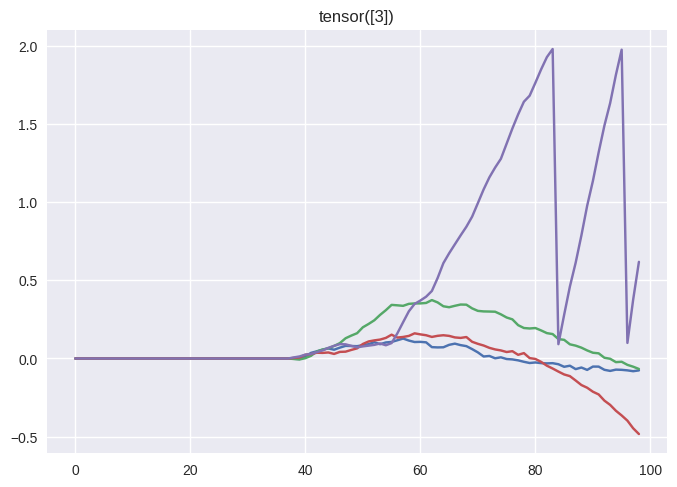

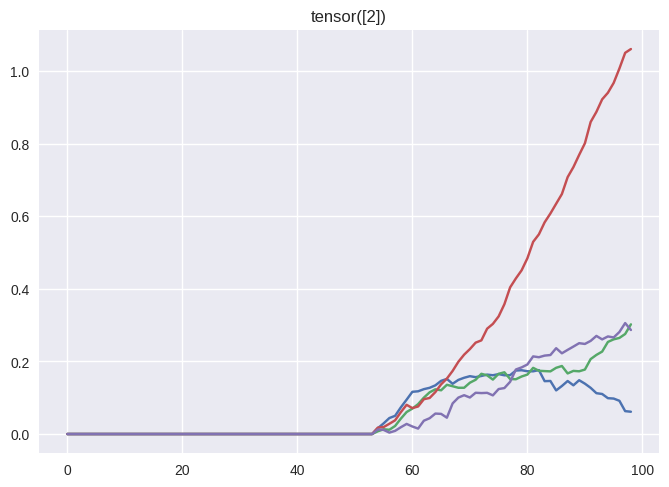

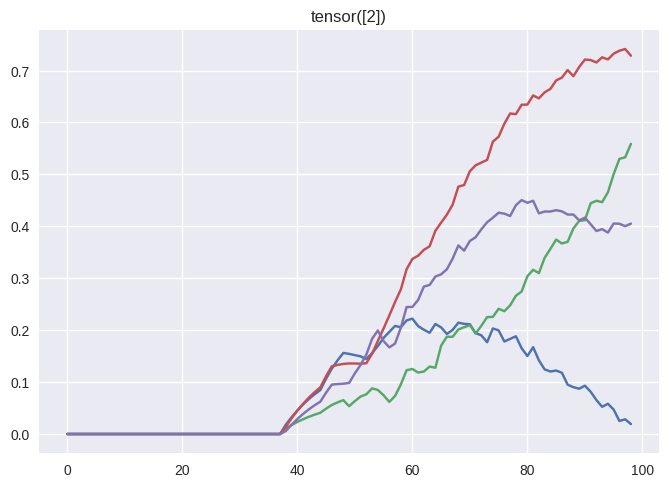

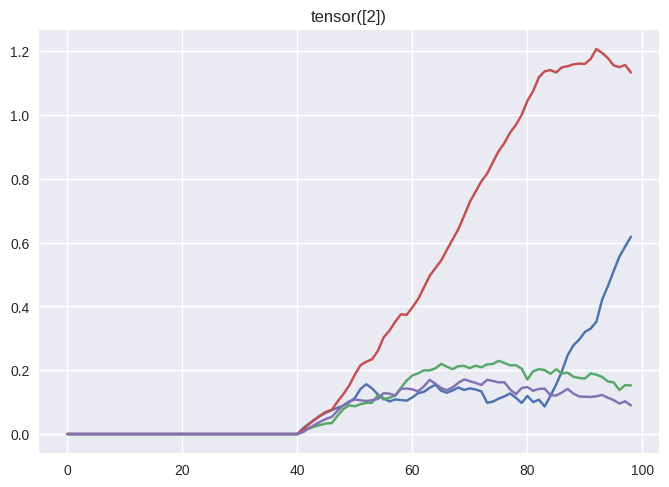

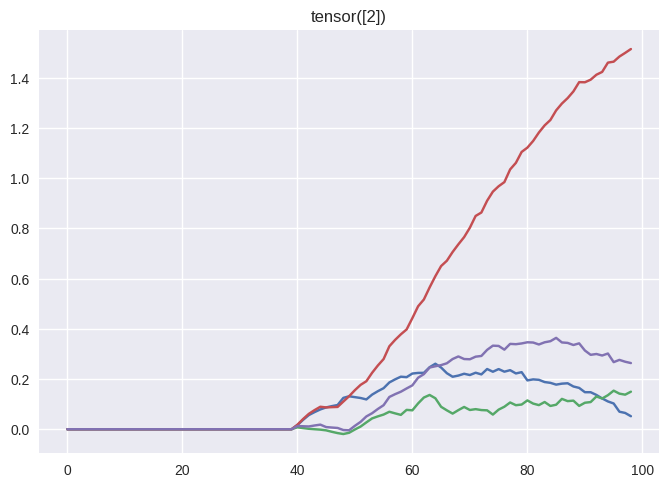

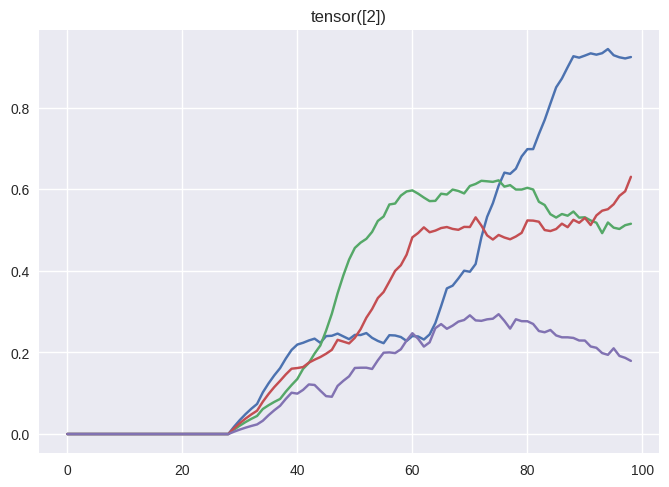

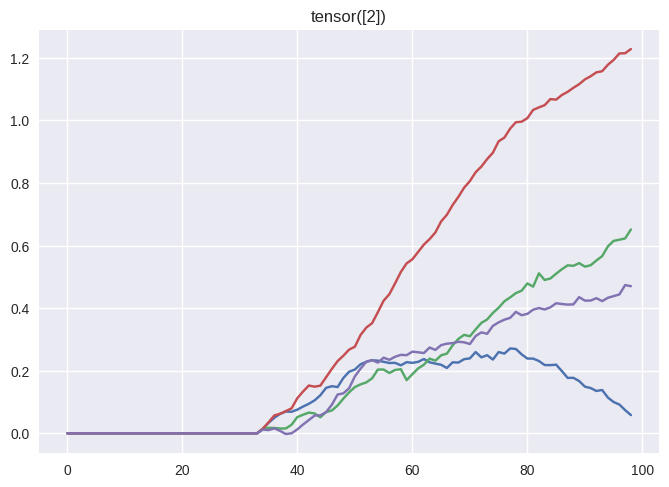

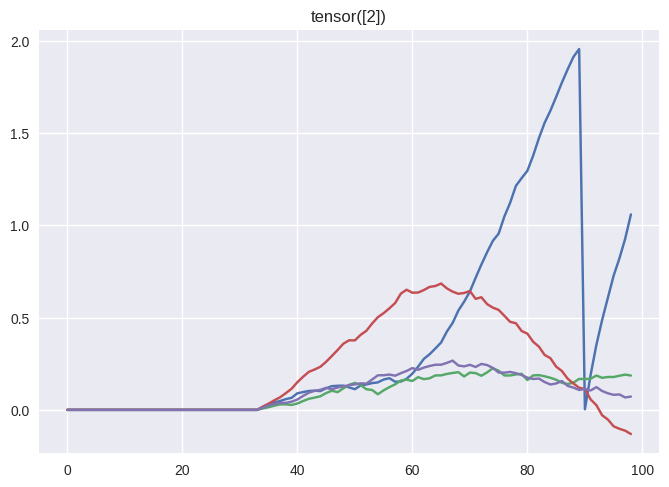

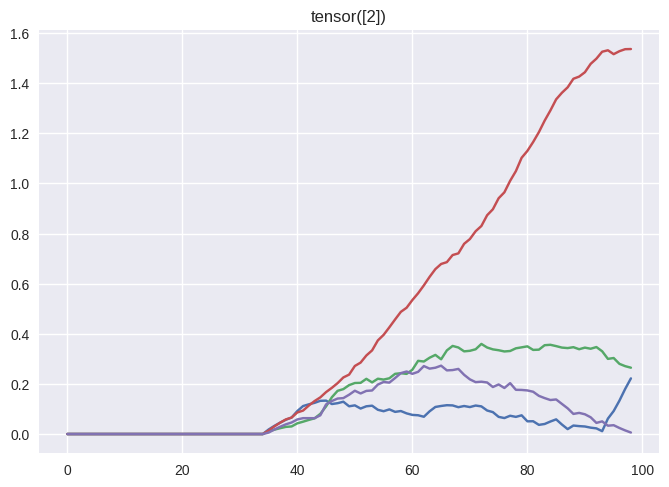

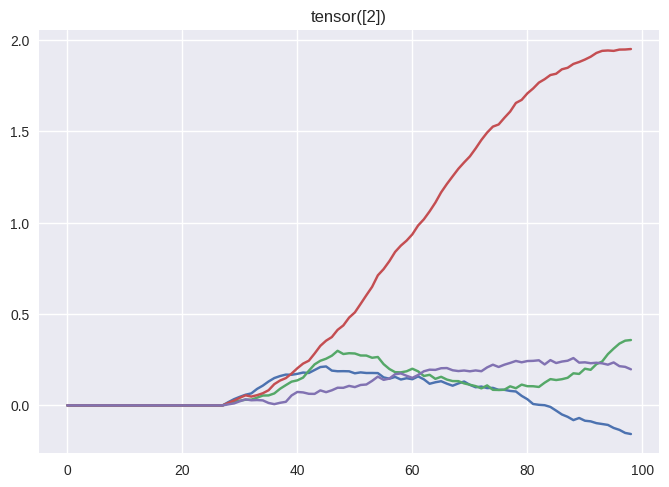

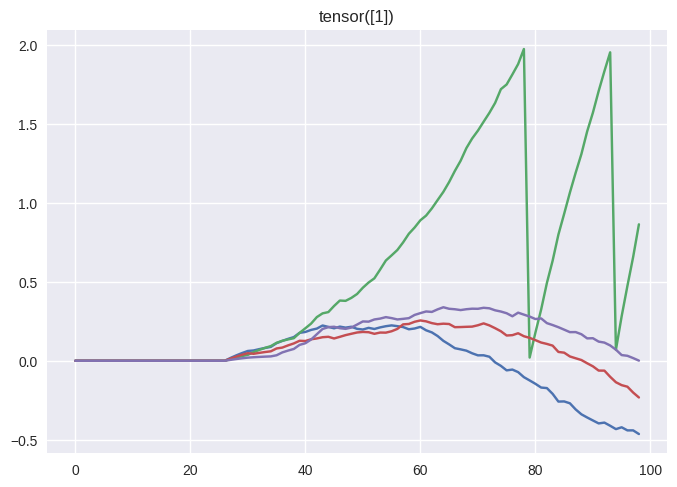

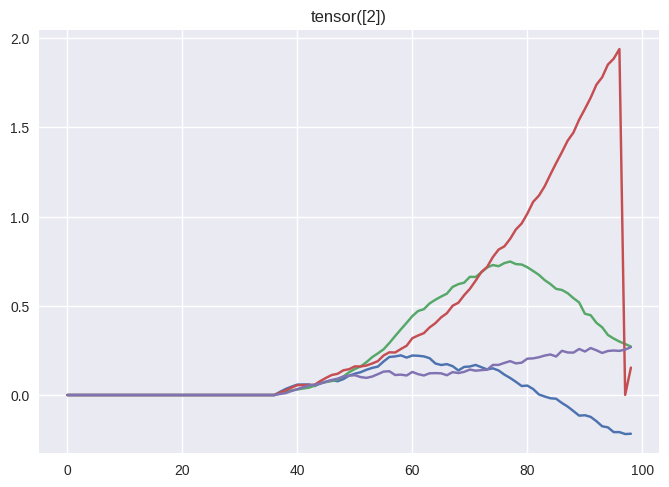

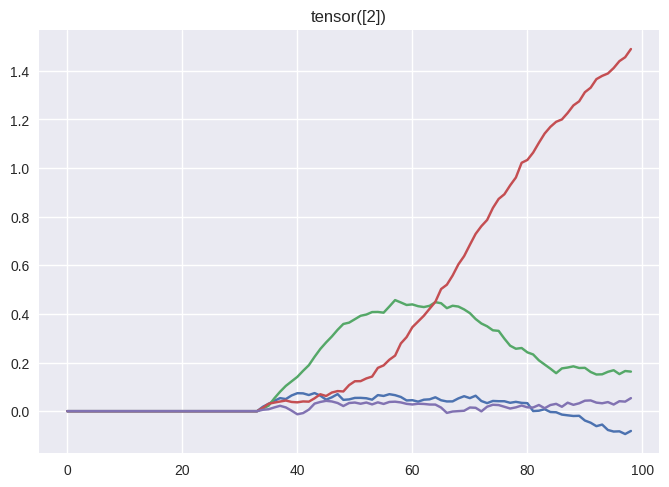

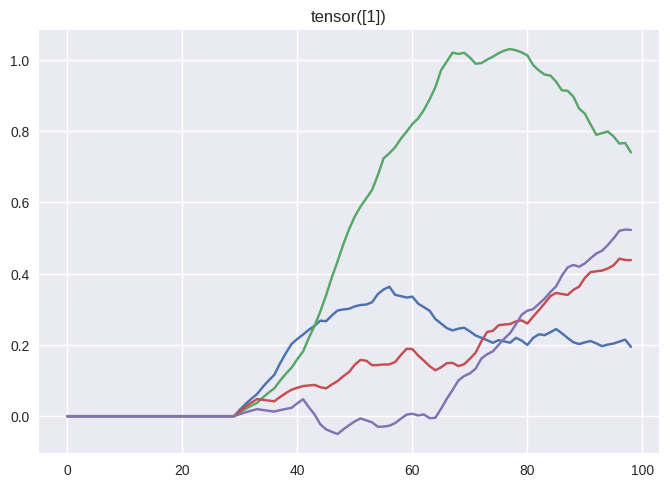

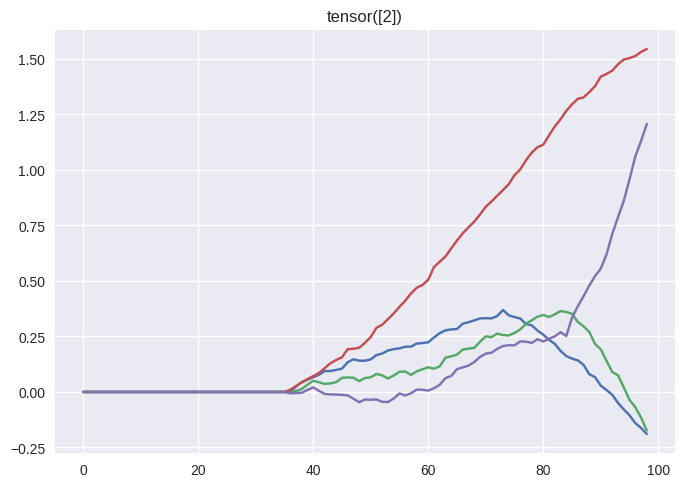

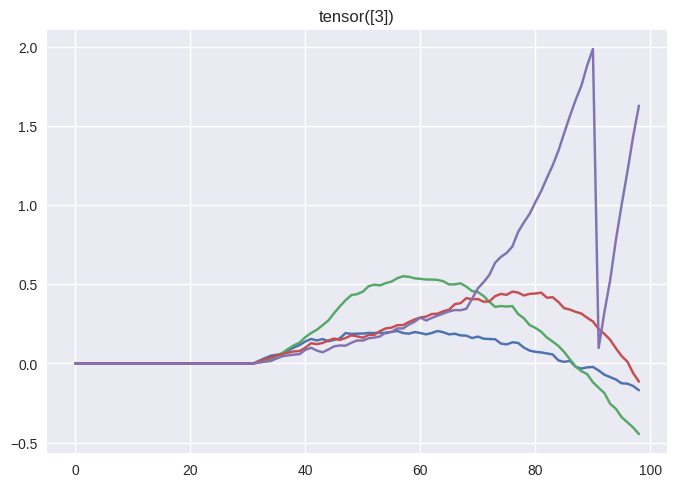

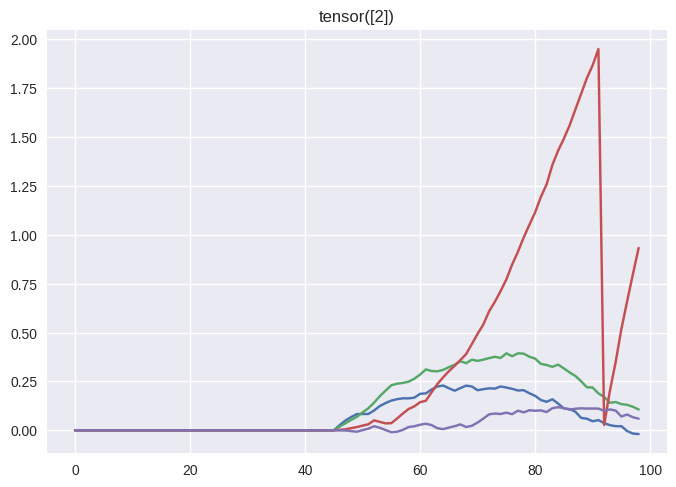

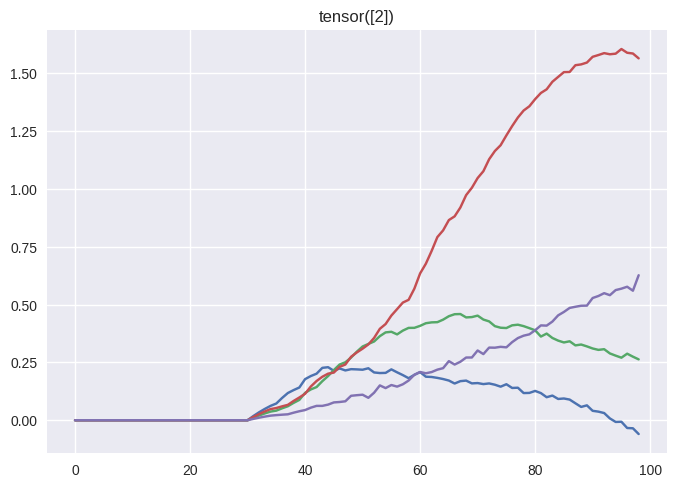

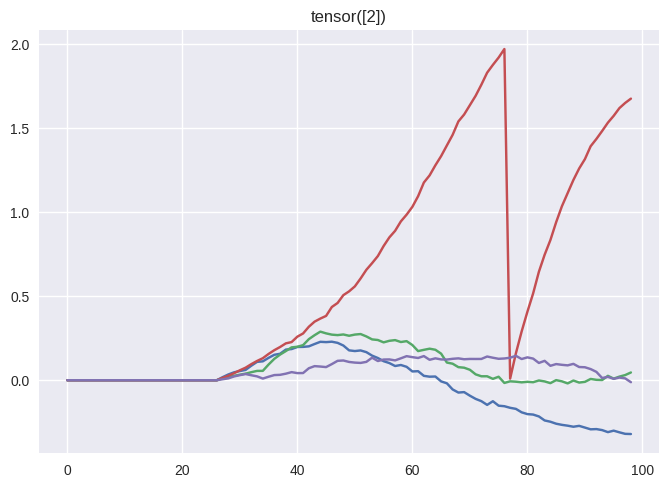

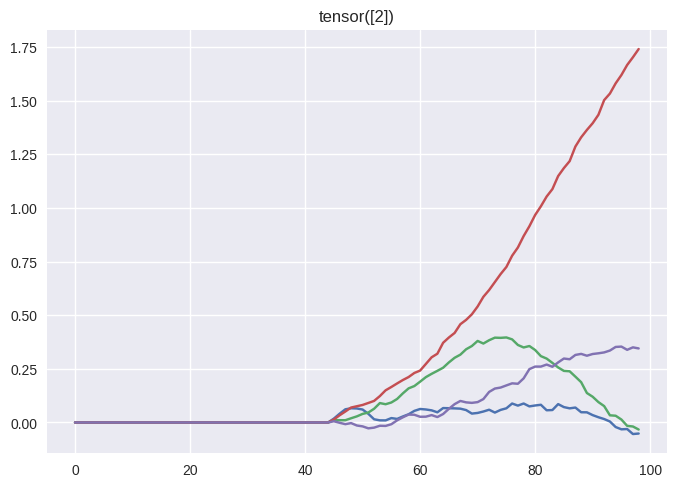

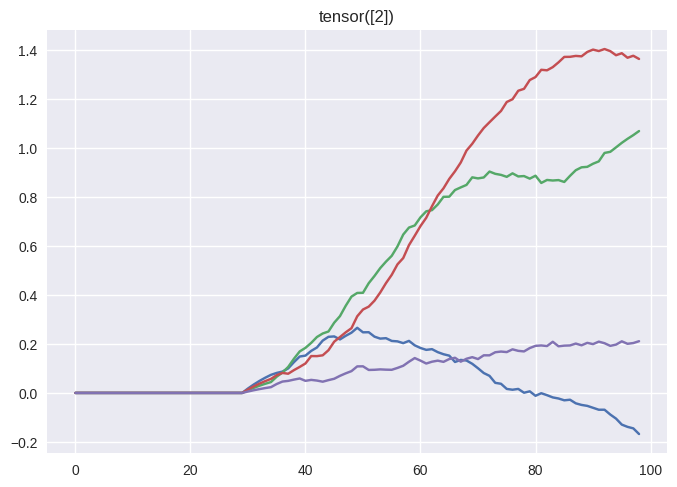

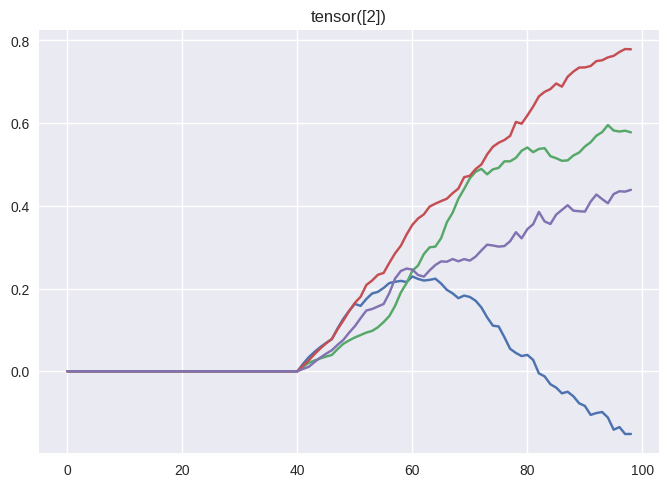

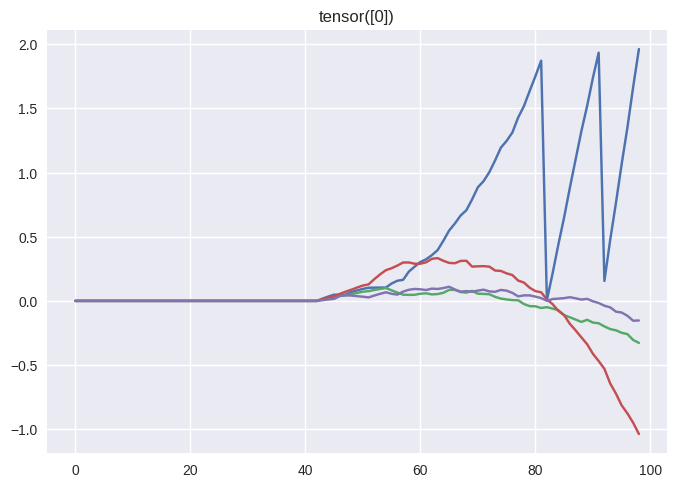

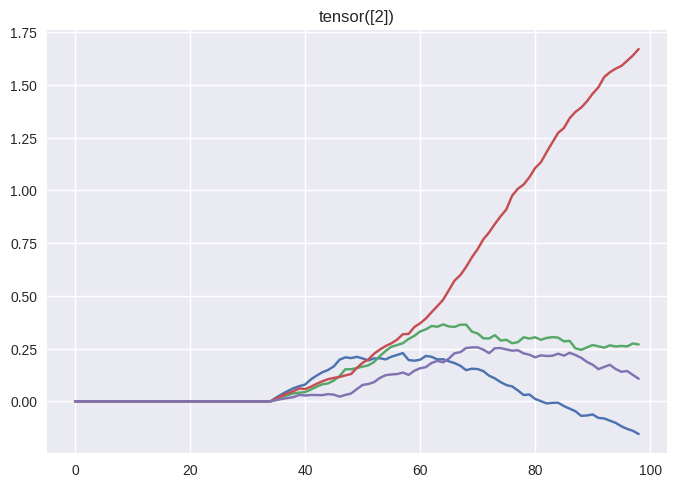

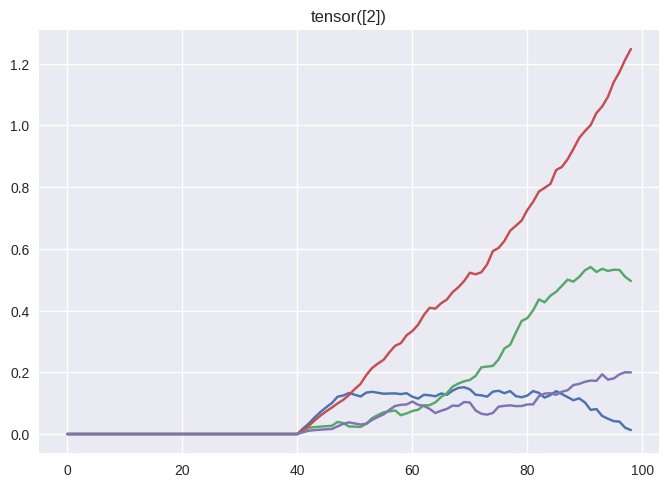

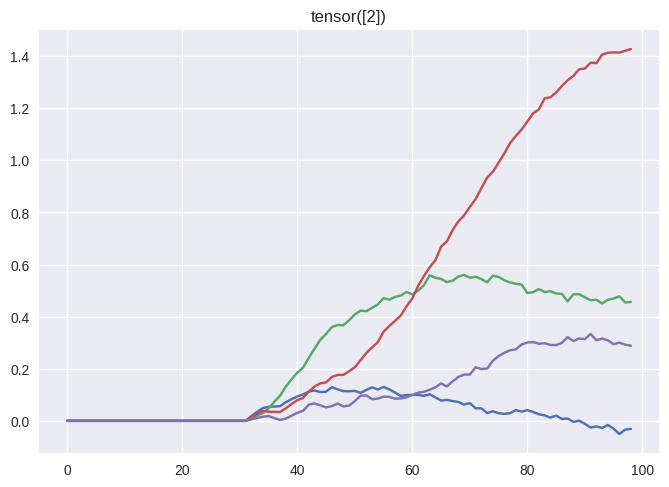

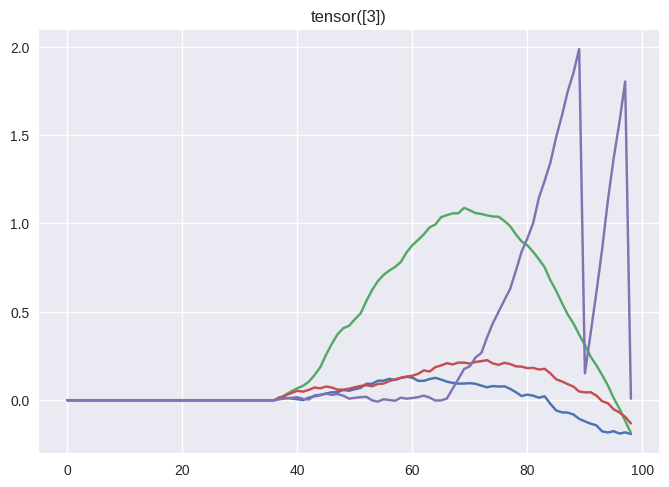

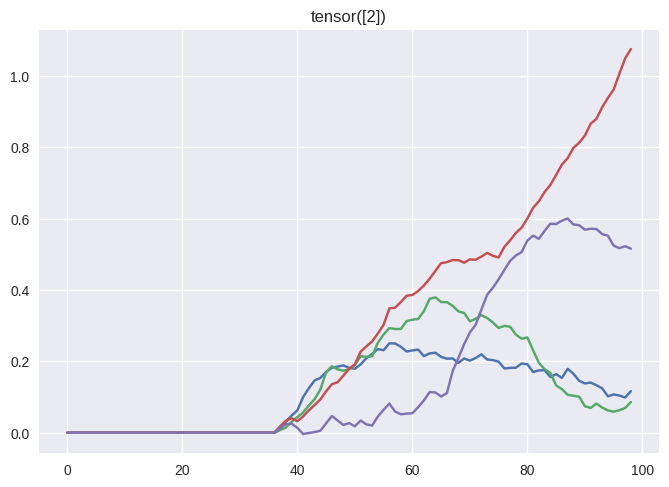

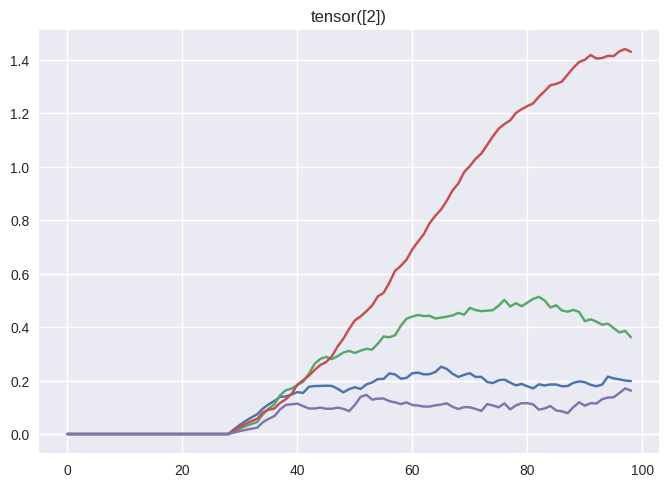

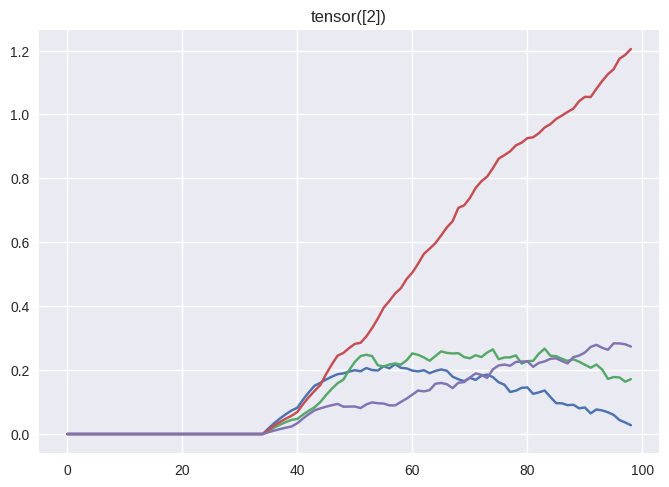

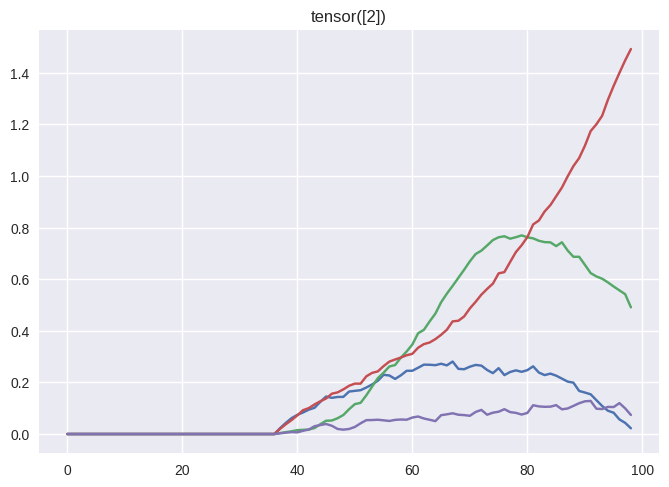

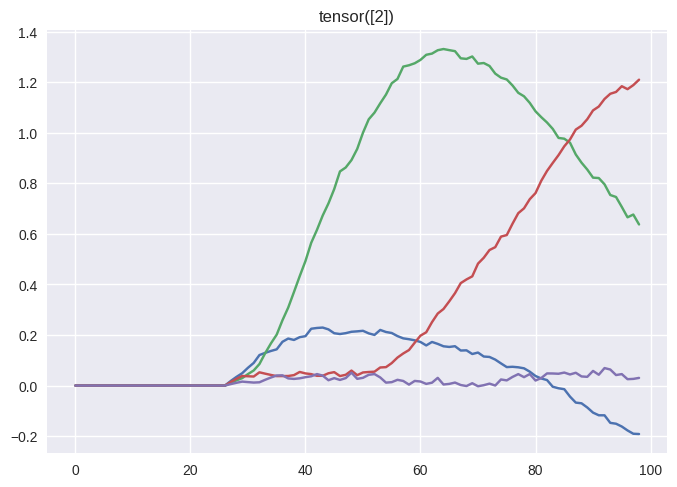

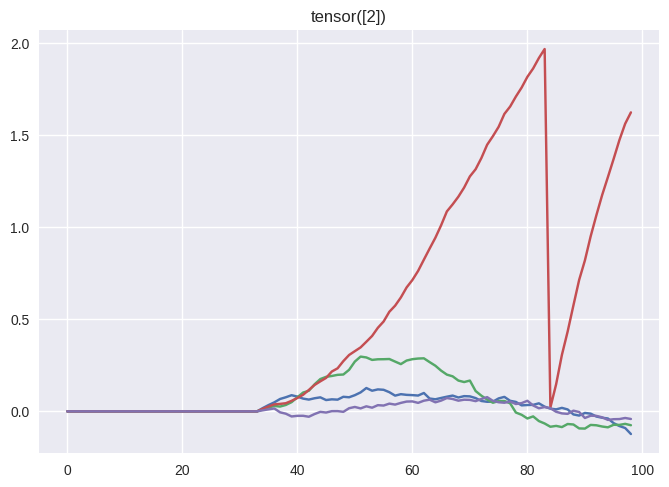

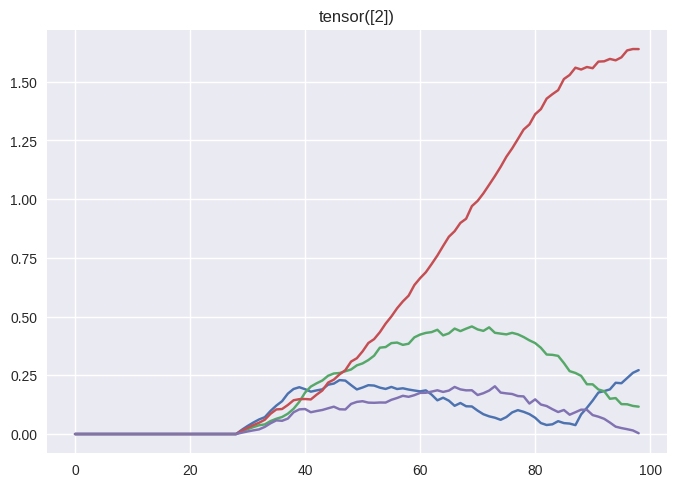

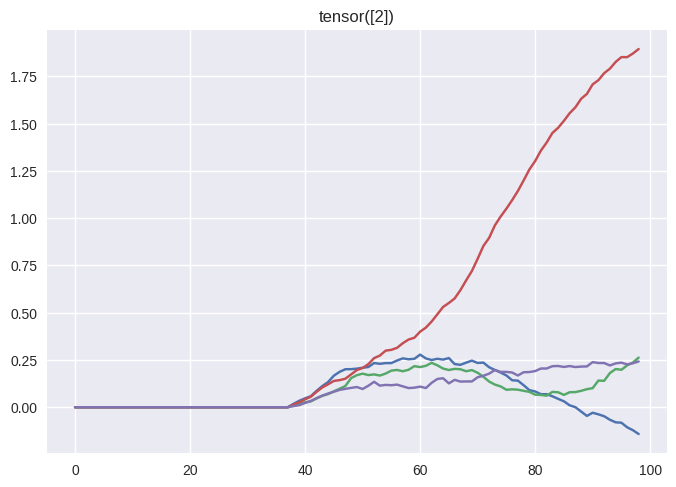

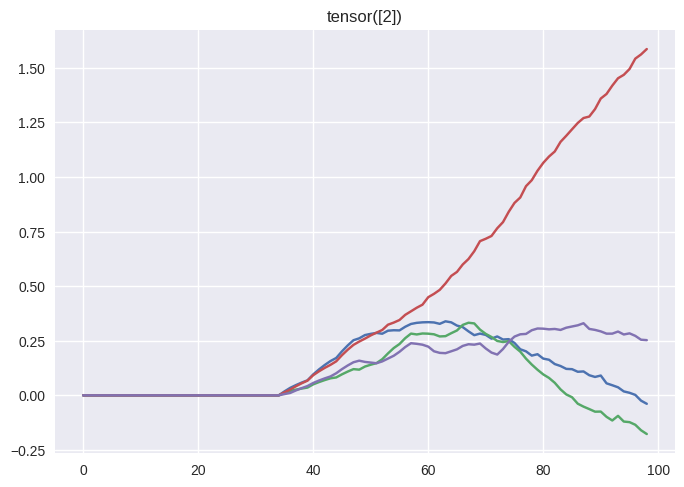

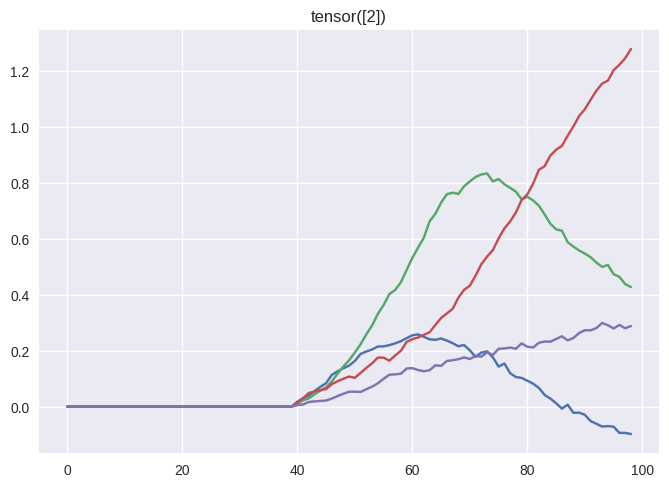

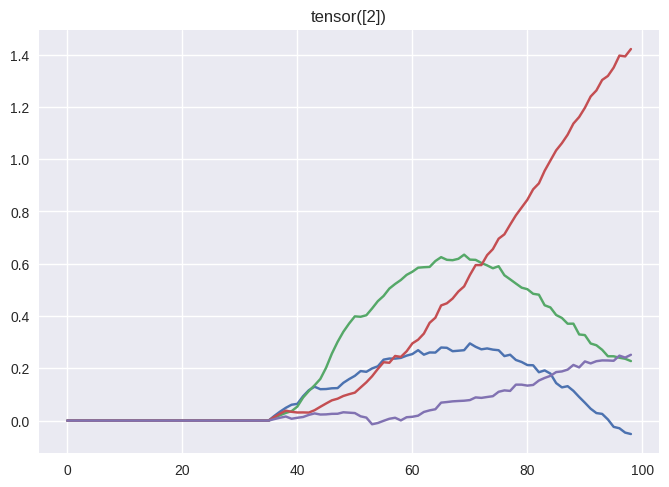

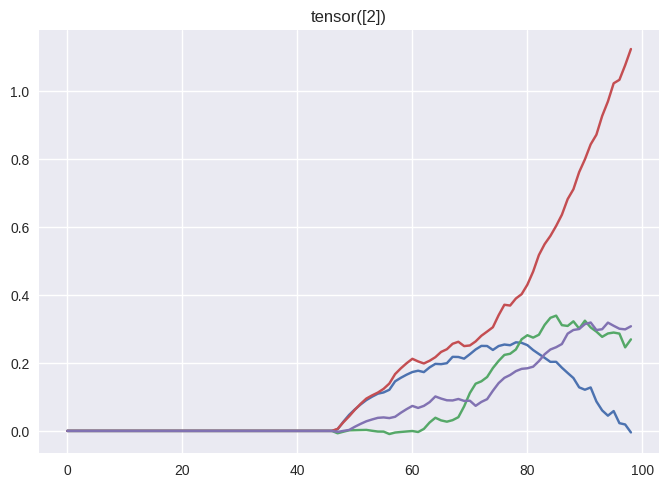

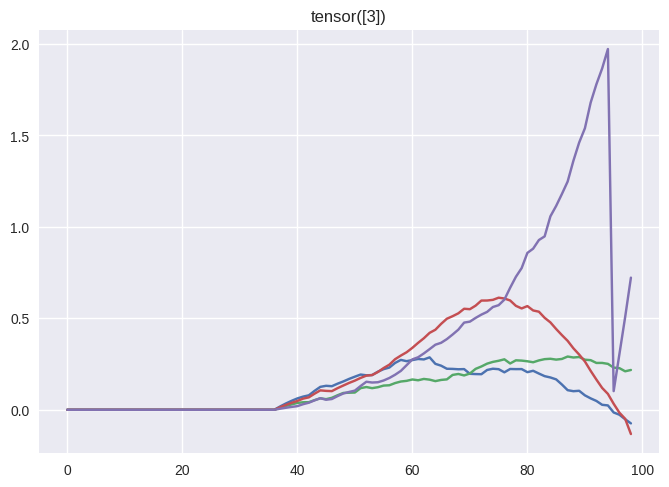

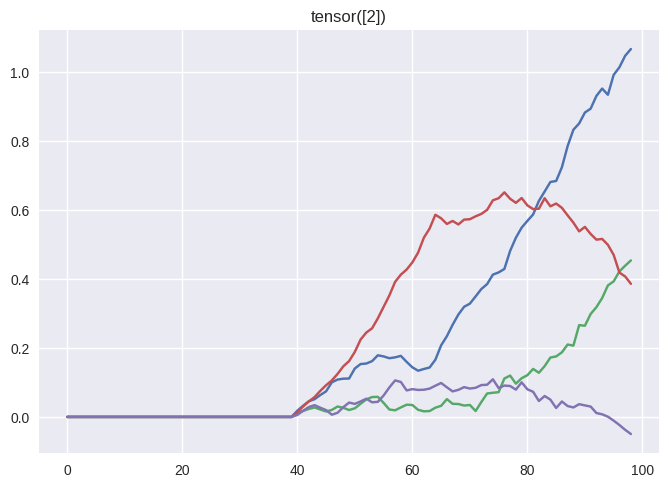

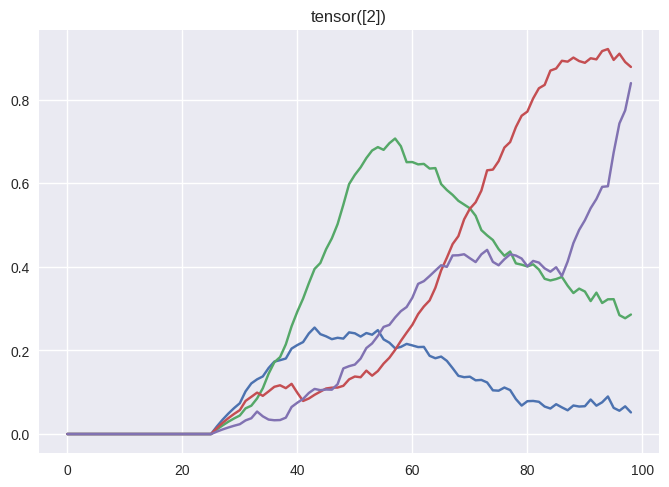

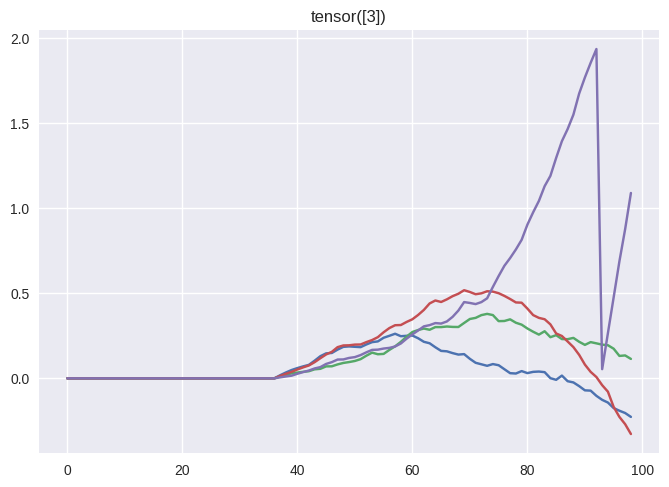

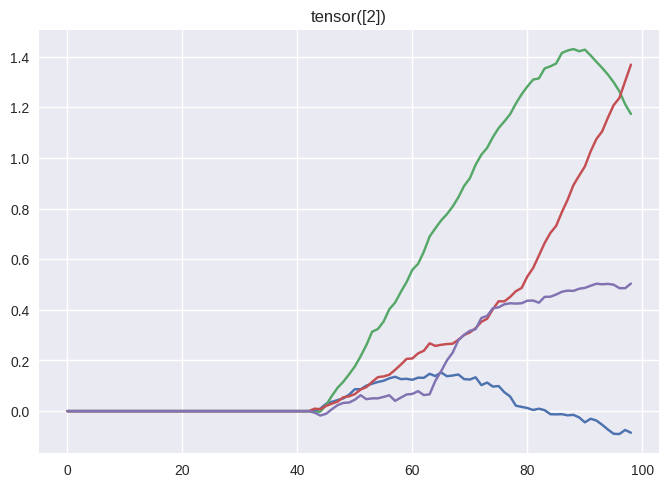

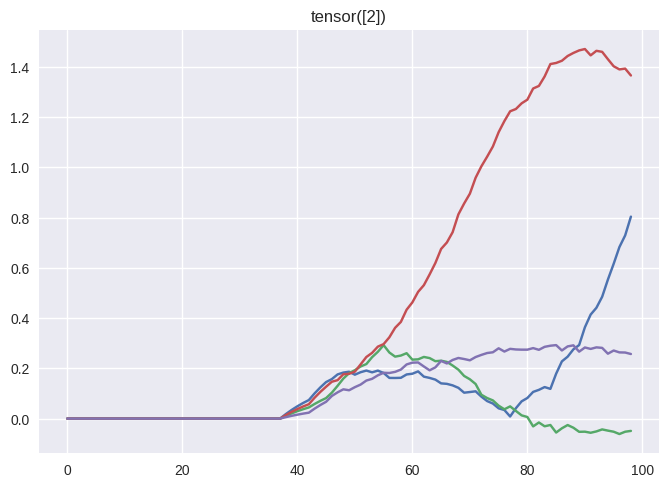

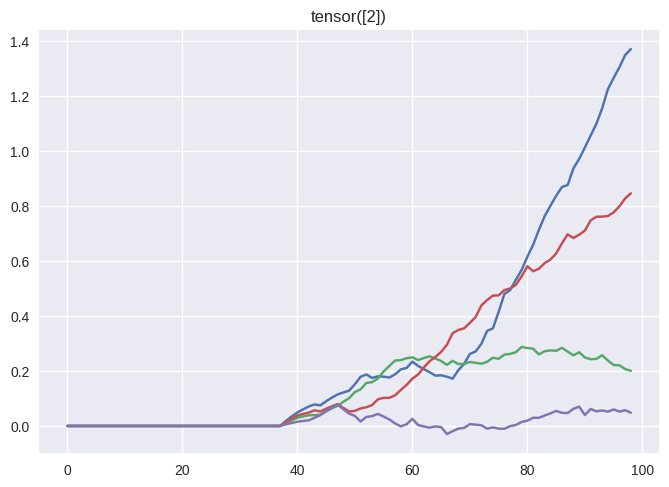

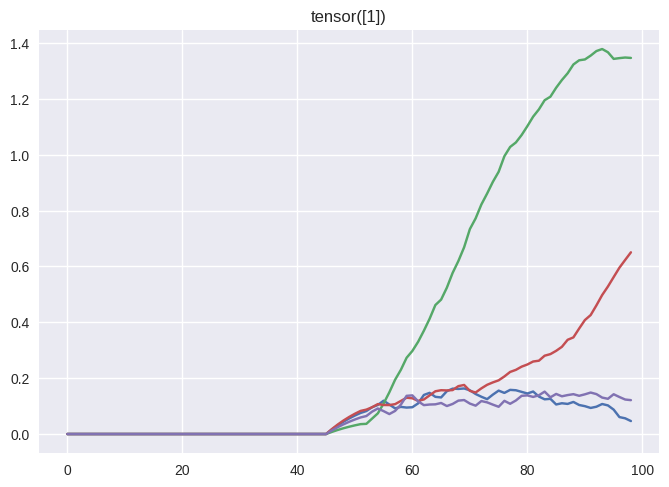

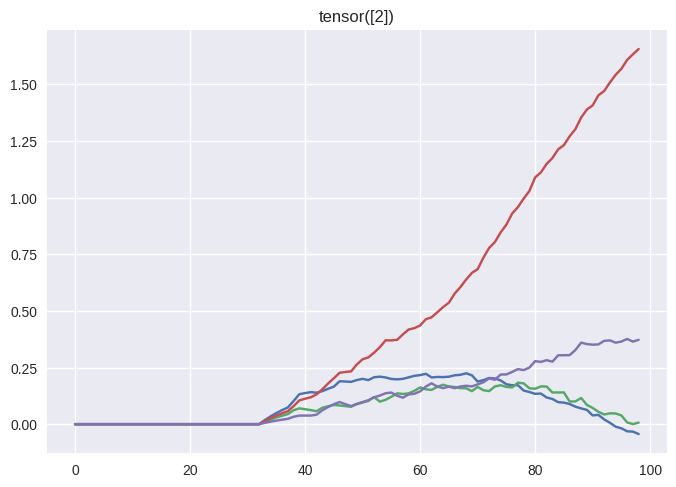

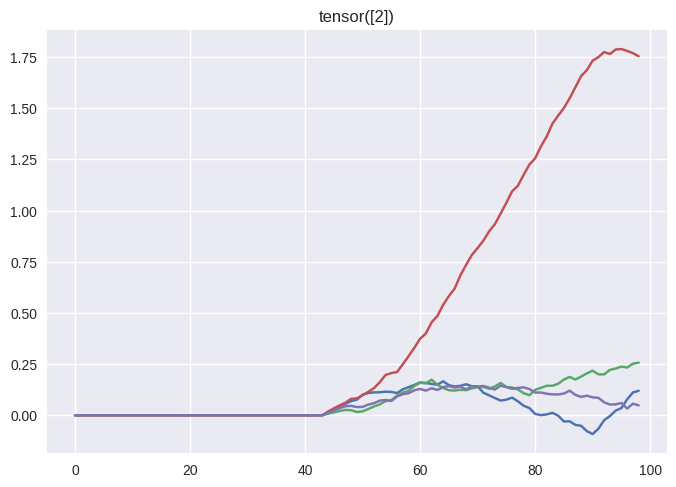

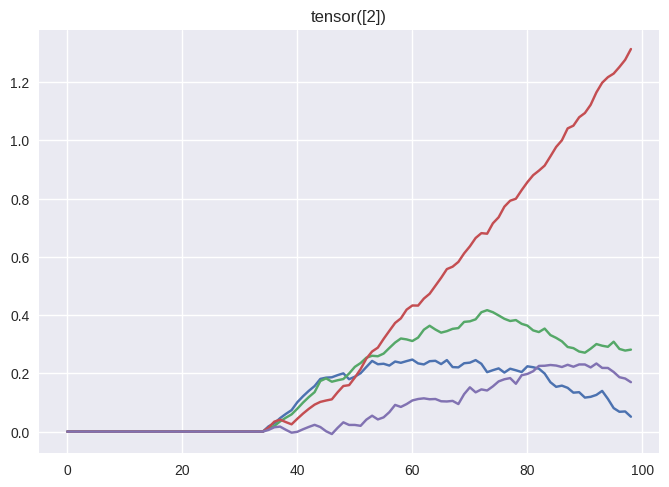

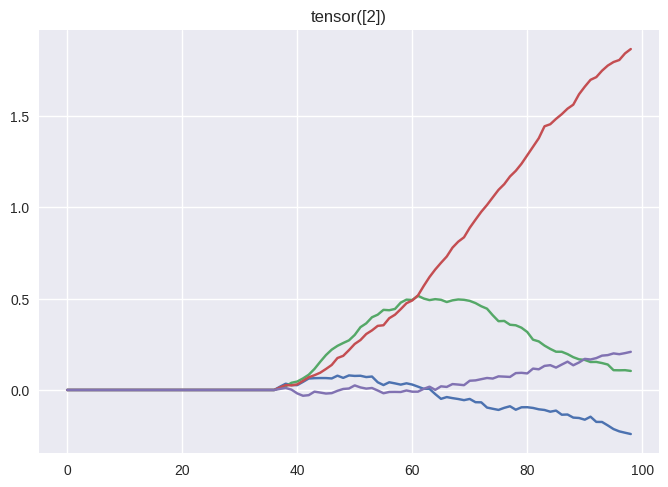

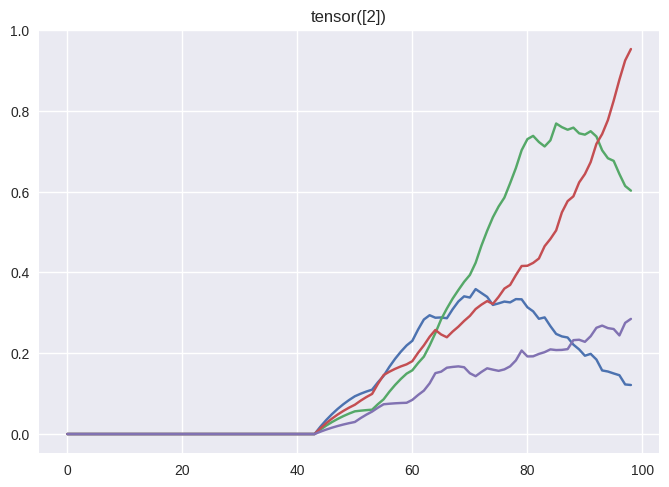

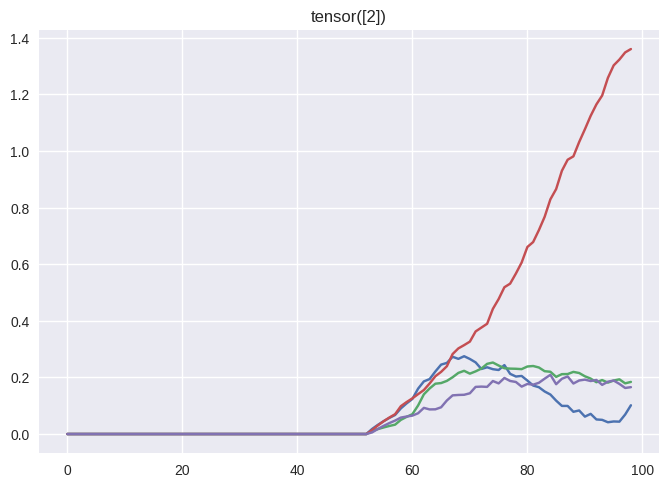

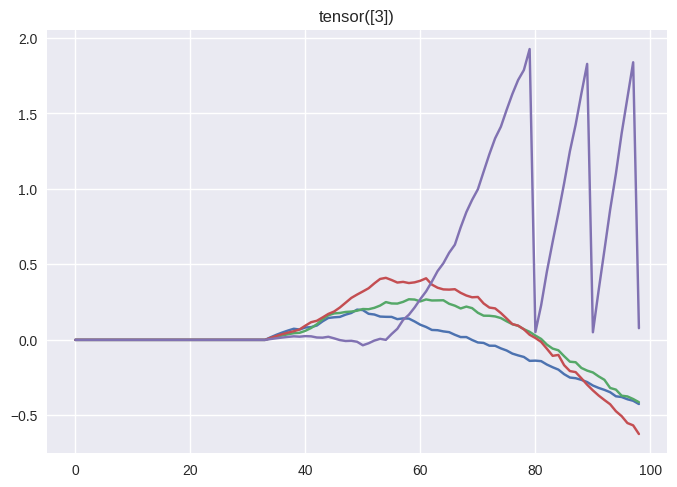

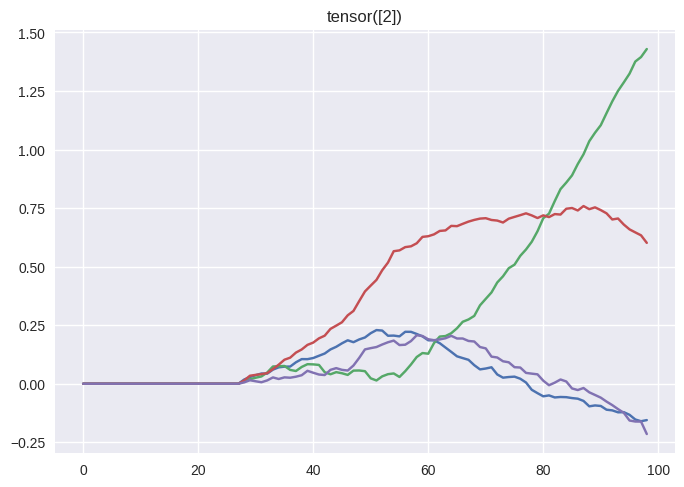

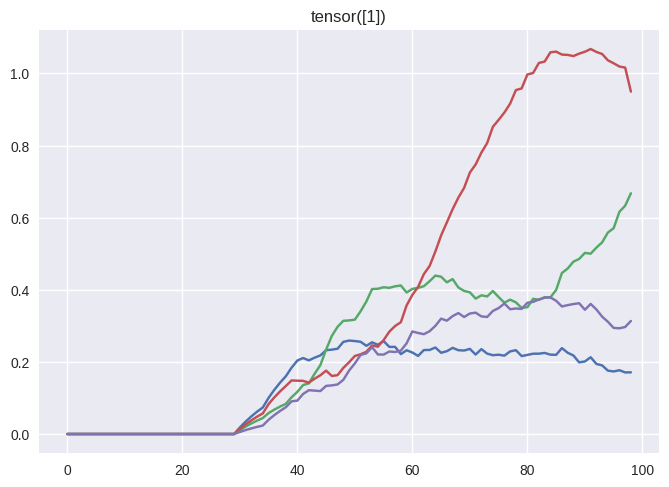

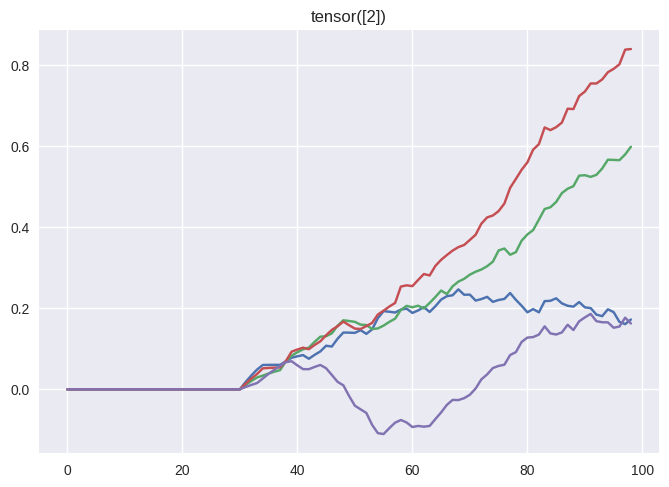

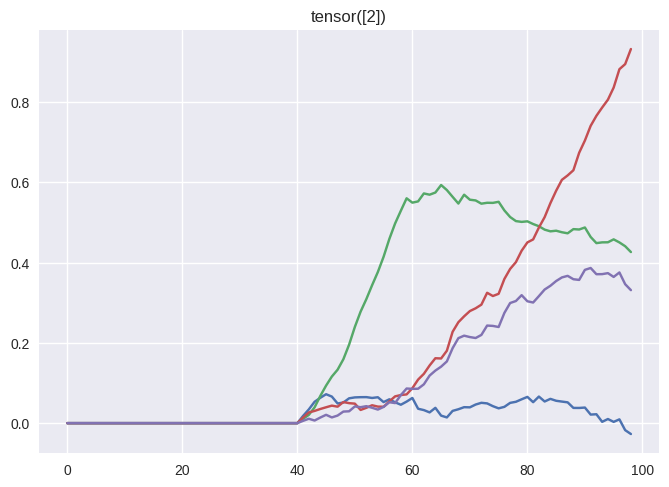

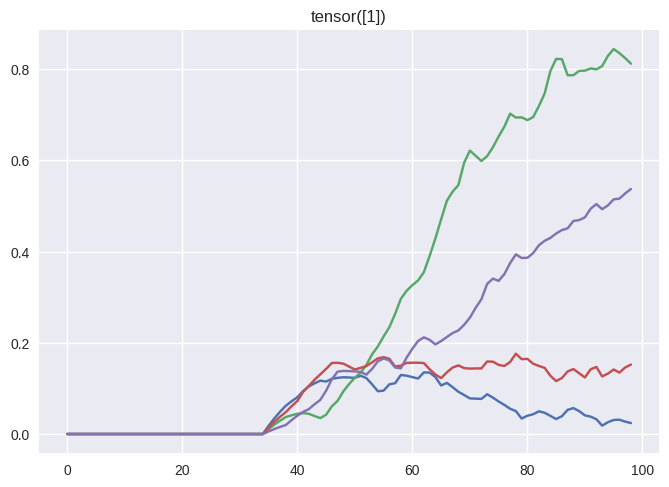

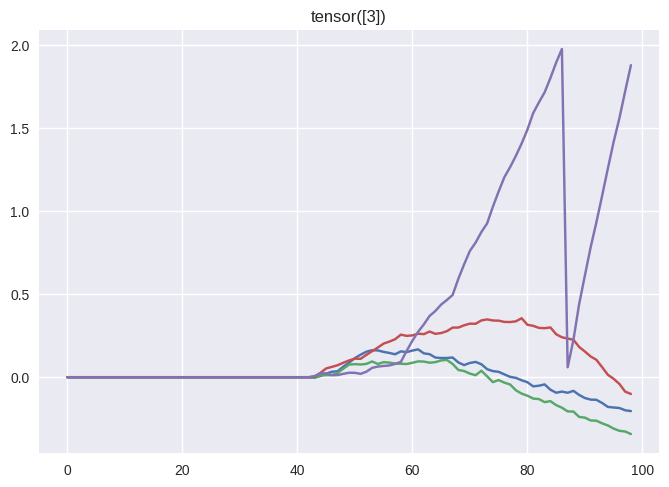

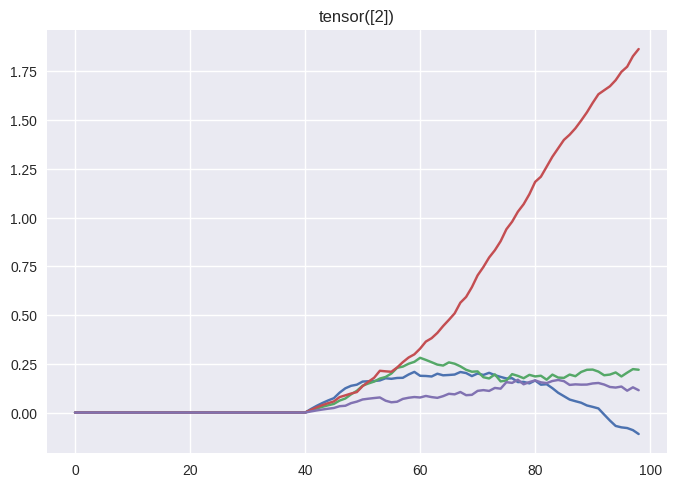

KeyboardInterrupt: 

In [6]:
from torch.nn import CrossEntropyLoss, MSELoss
from torch.optim import Adam, SGD
import torch
from function import *
import matplotlib.pyplot as plt
plt.style.use('seaborn')
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)
Nout = 4

for epoch in range(500):
    train_preds = []
    train_targets = []
    sum_loss = 0.0
    for batch, target in (test_dataloader):
        batch = batch.transpose(1, 2)
        batch = batch.to(torch.float32)
        target_loss = (torch.tensor(encode_labels(target,Nout,thr_out))).float()
        snn.reset_state()
        out_model, _, rec = snn(batch, record=True)
        plt.plot((rec['spk_out']['vmem'][0]).detach().numpy())
        plt.title(f'{target}')
        plt.show()